## Regulatization

In [15]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

x1_train.shape=(10, 1), y1_train.shape=(10, 1)


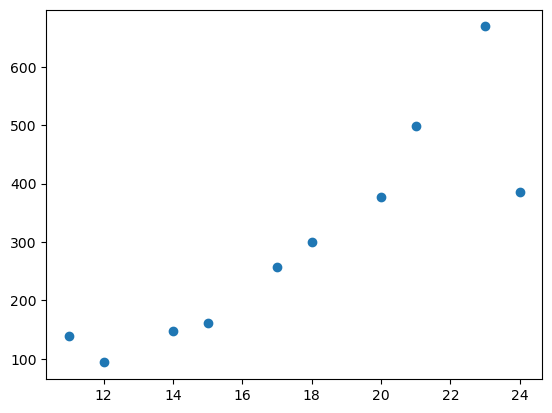

In [ ]:
with open('./lin_reg_training.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)
x1 = data[:,0]
y1 = data[:,1]
plt.scatter(x1,y1)

training_data1 = pd.read_csv('lin_reg_training.csv', header=None, names=['x', 'y'])
x1_train = training_data1[['x']].values
y1_train = training_data1[['y']].values
print(f'{x1_train.shape=}, {y1_train.shape=}')

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split


standard_scaler = StandardScaler()
x1_train_SS = standard_scaler.fit_transform(x1_train)

In [ ]:
poly_features = PolynomialFeatures(degree=6)
X1_train_poly = poly_features.fit_transform(x1_train_SS)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression

In [23]:
reg1 = LinearRegression()
reg1.fit(X1_train_poly,y1_train)

LinearRegression()

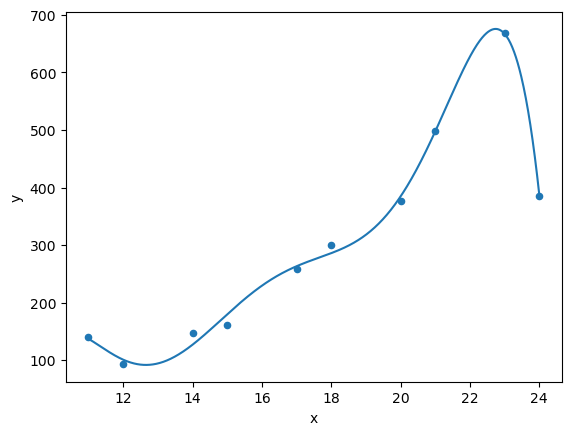

In [25]:
x_reg = np.linspace(x1_train.min(), x1_train.max(), 1000).reshape(-1,1)
x_reg_SS = standard_scaler.transform(x_reg)
x_reg_poly = poly_features.transform(x_reg_SS)
y_reg = reg1.predict(x_reg_poly)

training_data1.plot(kind='scatter', x='x', y='y')
plt.plot(x_reg.flatten(), y_reg.flatten())
plt.show()

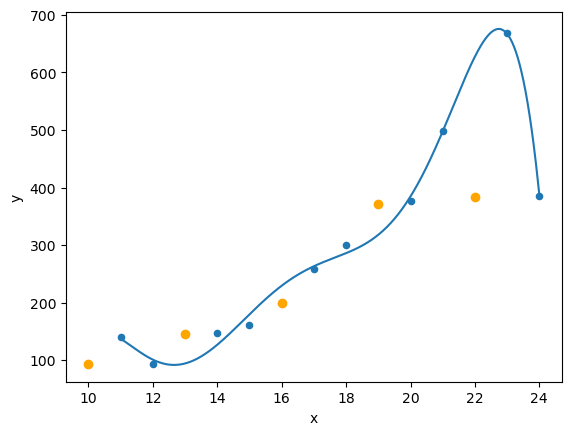

Funkcja kosztu (MSE) na zbiorze testowym: 13426.689013146019


In [27]:
test_data1 = pd.read_csv('lin_reg_test.csv', header=None, names=['x', 'y'])

x1_test = test_data1[['x']].values
y1_test = test_data1[['y']].values

x_reg = np.linspace(x1_train.min(), x1_train.max(), 1000).reshape(-1,1)
x_reg_SS = standard_scaler.transform(x_reg)
x_reg_poly = poly_features.transform(x_reg_SS)
y_reg = reg1.predict(x_reg_poly)

training_data1.plot(kind='scatter', x='x', y='y')
plt.scatter(test_data1['x'], test_data1['y'], color='orange', label='Test Data')
plt.plot(x_reg.flatten(), y_reg.flatten())
plt.show()

from sklearn.metrics import mean_squared_error

x1_test
x1_test_SS = standard_scaler.transform(x1_test)
x1_test_poly = poly_features.transform(x1_test_SS)

y1_test_pred = reg1.predict(x1_test_poly)
test_cost = mean_squared_error(y1_test, y1_test_pred)
print("Funkcja kosztu (MSE) na zbiorze testowym:", test_cost)

## Regularyzacja L2 - Ridge

In [30]:
from sklearn.pipeline import Pipeline

def get_linear_regression(alpha, degree=6):
  return Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('regression', Ridge(alpha=alpha))
  ])

7428.887392045699
5210.601345471123
11197.451519189233
13231.367950450516
13409.665106911449


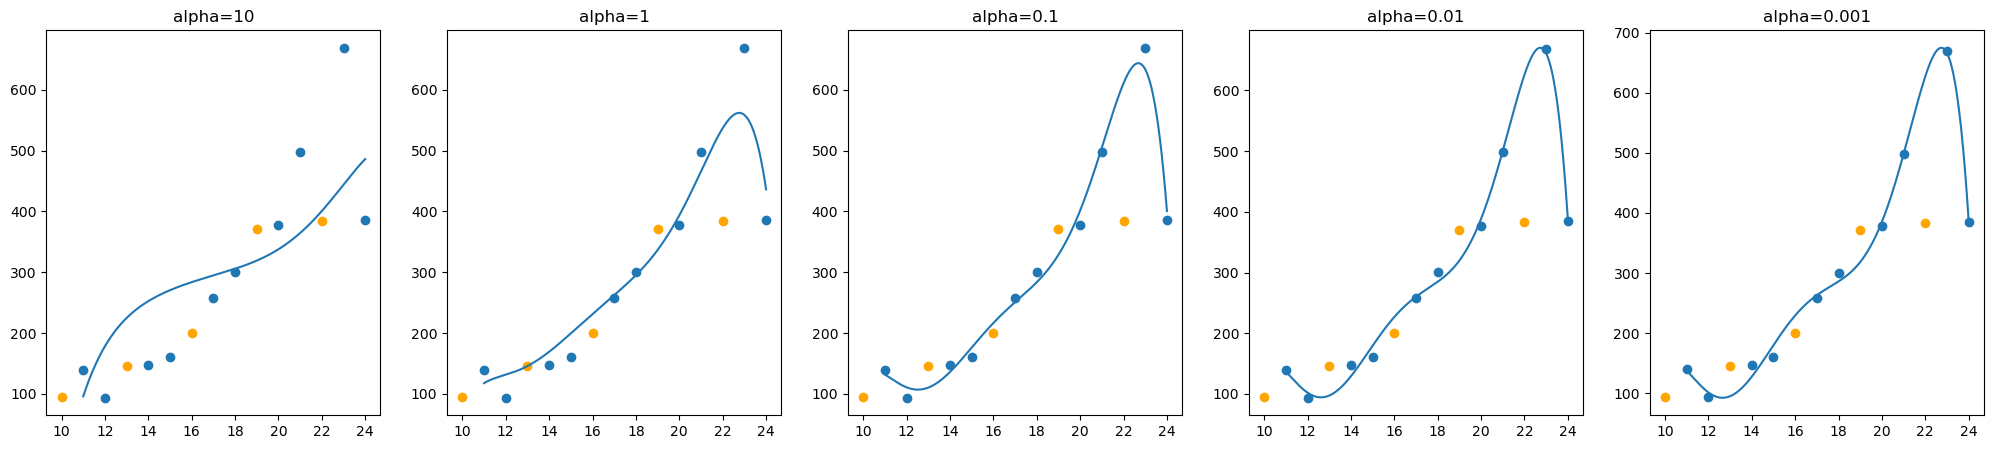

In [31]:
lambdas = [10, 1, 0.1, 0.01, 0.001] 
costs = {}
n = len(lambdas)
fig, ax = plt.subplots(1, n, figsize=(n*5, 5))
for i, alpha in enumerate(lambdas):
  reg = get_linear_regression(alpha)
  reg.fit(x1_train, y1_train)
  y1_pred = reg.predict(x1_test)
  cost = mean_squared_error(y1_test, y1_pred)
  print(cost)
  costs[alpha] = cost
  x_reg = np.linspace(x1_train.min(), x1_train.max(), 1000).reshape(-1,1)
  y_reg = reg.predict(x_reg)

  ax[i].scatter(training_data1['x'], training_data1['y'])
  ax[i].scatter(test_data1['x'], test_data1['y'], color='orange', label='Test Data')
  ax[i].set_title(f'alpha={alpha}')
  ax[i].plot(x_reg.flatten(), y_reg.flatten())
plt.show()

## Ridge na logistycznej

In [36]:
train2_data = pd.read_csv('logi_reg_training.csv', header=None, names=['x1','x2','y'])
test2_data = pd.read_csv('logi_reg_test.csv', header=None, names=['x1','x2','y'])

x1_train2 = train2_data[['x1']].values.reshape(-1,1)
x2_train2 = train2_data[['x2']].values.reshape(-1,1)
y_train2 = train2_data[['y']].values.reshape(-1,1)

x1_test2 = test2_data[['x1']].values.reshape(-1,1)
x2_test2 = test2_data[['x2']].values.reshape(-1,1)
y_test2 = test2_data[['y']].values.reshape(-1,1)

x_train2 = np.concatenate([x1_train2, x2_train2], axis=1)
x_test2 = np.concatenate([x1_test2, x2_test2], axis=1)

In [37]:
def logistic_regression(alpha, degree=6):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('regression', LogisticRegression(penalty='l2', C=alpha, solver='lbfgs'))
    ])

c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


alpha=10, cost=0.0476
alpha=1, cost=0.0000


c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


alpha=0.1, cost=0.0952
alpha=0.01, cost=0.1905


c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


alpha=0.001, cost=0.3810


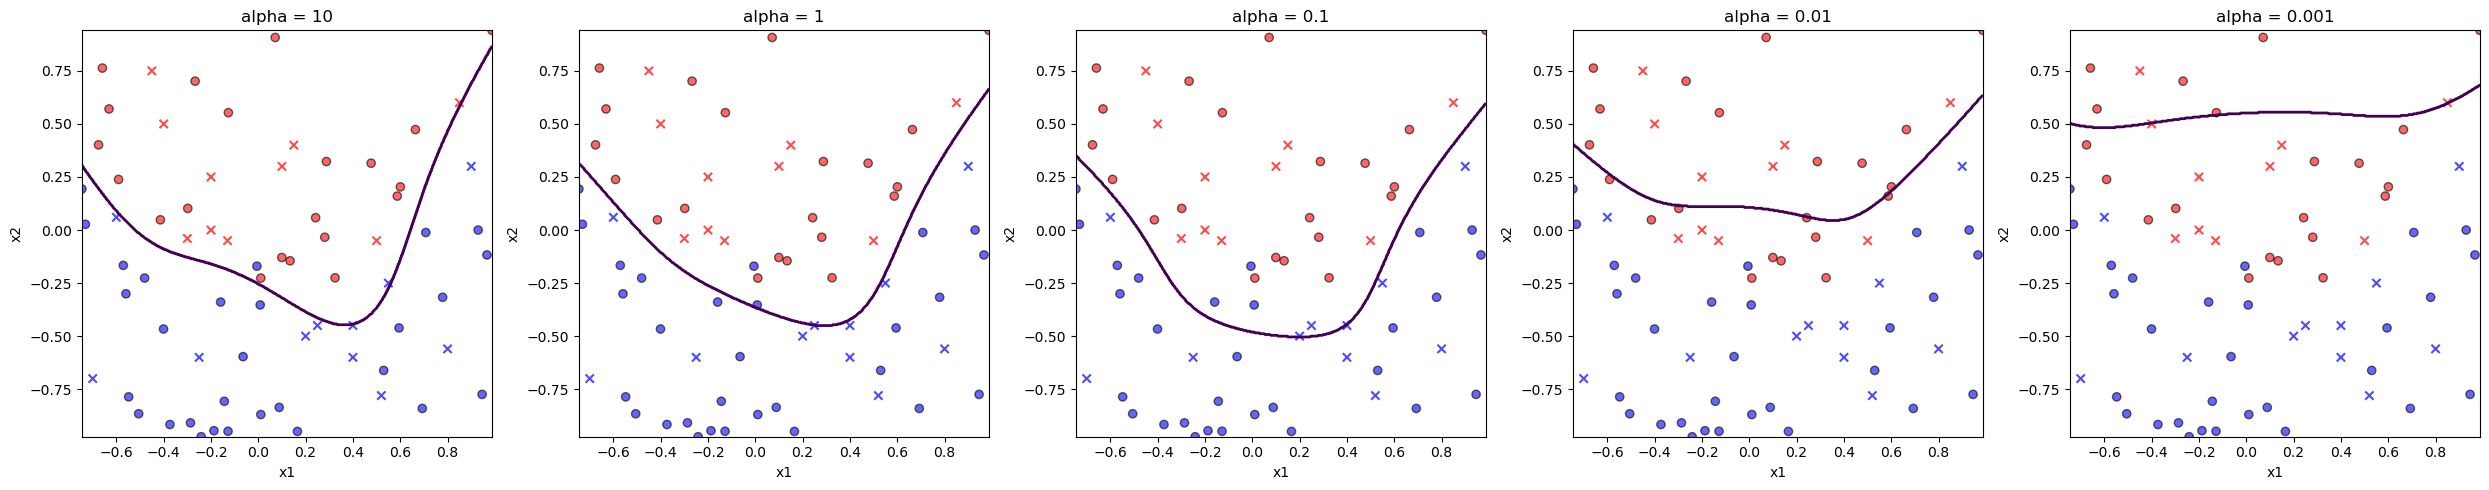

In [50]:
lambdas = [10, 1, 0.1, 0.01, 0.001]
costs = {}
fig, ax = plt.subplots(1, len(lambdas), figsize=(len(lambdas)*5,5))

for i, alpha in enumerate(lambdas):
    reg = logistic_regression(alpha)
    reg.fit(x_train2, y_train2)
    y_pred2 = reg.predict(x_test2)

    cost = mean_squared_error(y_test2, y_pred2)
    print(f'alpha={alpha}, cost={cost:.4f}')
    costs[alpha] = cost

    ax[i].scatter(x_train2[:, 0], x_train2[:, 1], c=y_train2, cmap='bwr', alpha=0.6, edgecolors='k')
    ax[i].scatter(x_test2[:, 0], x_test2[:, 1], c=y_test2, cmap='bwr', marker='x', label='Test', alpha=0.7)

    x1_min, x1_max = x_train2[:, 0].min(), x_train2[:, 0].max()
    x2_min, x2_max = x_train2[:, 1].min(), x_train2[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                         np.linspace(x2_min, x2_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = reg.predict(grid)
    zz = zz.reshape(xx.shape)

    # Granica decyzyjna
    ax[i].contour(xx, yy, zz, levels=[0.5], linewidths=2)
    ax[i].set_title(f'alpha = {alpha}')
    ax[i].set_xlabel('x1')
    ax[i].set_ylabel('x2')

plt.tight_layout()
plt.show()

## Regularyzacja na Iris

In [51]:
from sklearn.datasets import load_iris
 
data = load_iris()
x = data.data
y = data.target

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)
standard_scaler = StandardScaler()

In [63]:
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
 
log_regr = LogisticRegression(penalty=None)
log_regr.fit(x_train, y_train)
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)
y_train_probab = log_regr.predict_proba(x_train)
y_test_probabs = log_regr.predict_proba(x_test)
cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = log_regr.predict(x_test)
classification_report(y_test, y_test_pred)

c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        16\n           1       0.59      1.00      0.74        17\n           2       0.00      0.00      0.00        12\n\n    accuracy                           0.73        45\n   macro avg       0.53      0.67      0.58        45\nweighted avg       0.58      0.73      0.63        45\n'

In [65]:
poly_features = PolynomialFeatures(degree=6)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.transform(x_test) 
log_regr = LogisticRegression(penalty=None)
log_regr.fit(x_train, y_train)
y_train_probab = log_regr.predict_proba(x_train)
y_test_probabs = log_regr.predict_proba(x_test)
cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = log_regr.predict(x_test)
classification_report(y_test, y_test_pred)

c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        16\n           1       0.94      0.94      0.94        17\n           2       0.92      0.92      0.92        12\n\n    accuracy                           0.96        45\n   macro avg       0.95      0.95      0.95        45\nweighted avg       0.96      0.96      0.96        45\n'

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

poly_features = PolynomialFeatures(degree=6)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.transform(x_test) 
log_regr = LogisticRegression(penalty='l2', C=1)
log_regr.fit(x_train, y_train)
y_train_probab = log_regr.predict_proba(x_train)
y_test_probabs = log_regr.predict_proba(x_test)
cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = log_regr.predict(x_test)
classification_report(y_test, y_test_pred)

c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        16\n           1       1.00      1.00      1.00        17\n           2       1.00      1.00      1.00        12\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n'